In [1]:
# Math
import numpy as np
# Plotting
import matplotlib.pyplot as plt
# Modules
import importlib #Reload
import Diffusion_w_Consumption

In [2]:
# Reload the module
importlib.reload(Diffusion_w_Consumption)
# Import the classes again
from Diffusion_w_Consumption import DiffusionWithConsumption1D

# Apply rcParams configuration
configure_rc_params()

# Generalising Step Concentrations

Concentration profile described by a midstep with varying starting positions ($x_0$) and lenghts ($l$), with the restriction $x_0 + l \leq L$.

In [3]:
def midstep_generator(x0, l):
    'Define the inner step function that takes x as parameter'
    def c_midstep(x):
        'Determine the condition based on x0 and l'
        cond = (x >= x0) & (x <= x0 + l)
        # Return 1/l where the condition is True, otherwise return 0
        return np.where(cond, 1 / l, 0)
    
    return c_midstep

def compute_flux_map(syst_params, n0_func, n_x0, n_l):
    # Generate values for x0 and l, evenly spaced between 0 and L
    x0_values = np.linspace(0, L, n_x0)[1::]
    l_values  = np.linspace(0, L, n_l )[1::] # [1::]: removes l=0 from array
    # Initialize a 2D array to store the absolute flux values at x=0
    flux_map = np.zeros((n_x0 - 1, n_l - 1))
    
    for i, x0 in enumerate(x0_values):
        for j, l in enumerate(l_values):
            if x0 + l <= L:
                c_func = midstep_generator(x0, l)
                diffusion_system = DiffusionWithConsumption1D(syst_params, n0_func, c_func)
                
                # Solve the PDE
                '''
                diffusion_system.solve_pde()
                # Store the absolute flux at x=0 for the last time point in the flux_map
                flux_map[i, j] = diffusion_system.abs_flux_at_x0[-1]
                '''
                
                # Solve the ODE
                diffusion_system.solve_ode()
                # Store the absolute flux at x=0 for the last time point in the flux_map
                flux_map[i, j] = diffusion_system.abs_flux_steady[0]
    
    return x0_values, l_values, flux_map

def plot_flux_map(x0_values, l_values, flux_map):
    plt.figure(figsize=(10, 8))
    plt.contourf(x0_values, l_values, flux_map.T, 20, cmap='viridis')
    plt.colorbar(label='$|\, \Phi(x=0)| \,$')
    plt.xlabel('Starting Point ($x_0$)')
    plt.ylabel('Step Lenght ($l$)')
    plt.title('Absolute Flux to the Diatom for Different Step Distributions of Bacteria')
    plt.show()

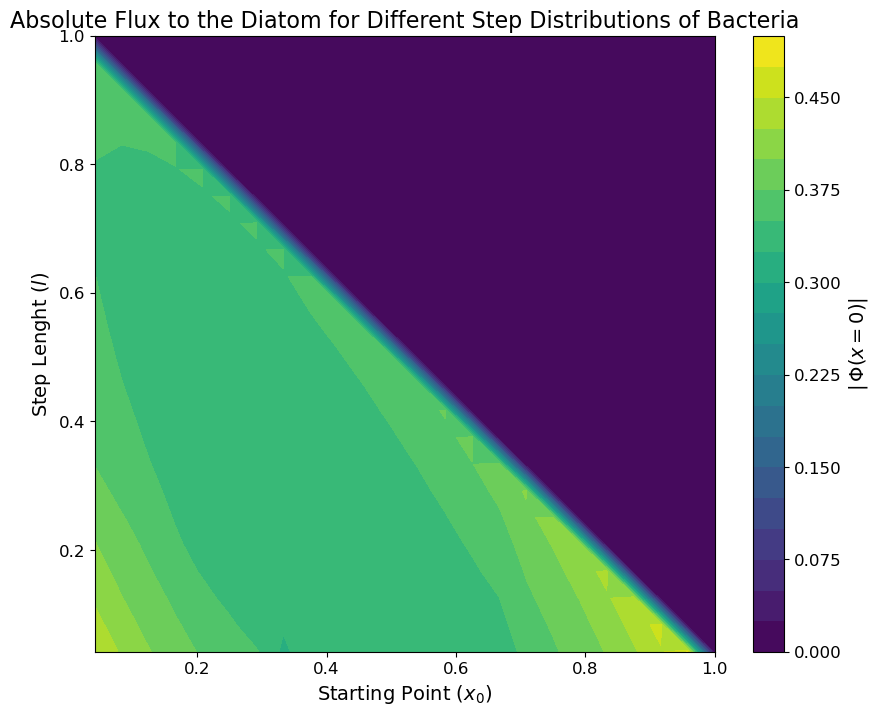

In [8]:
syst_params = {
'L' : 1.0,  'T' : 1.0,
'Tc': 1.0,  'Td': 1.0,
'Nb': 1.0,
'nx': 100,   'nt': 100
}
L = syst_params['L']

def n0_linear(x):
    return x / L

# Number of x0 & l points
n_x0 = n_l = 25

x0_values, l_values, flux_map = compute_flux_map(syst_params, n0_linear, n_x0, n_l)
plot_flux_map(x0_values, l_values, flux_map)

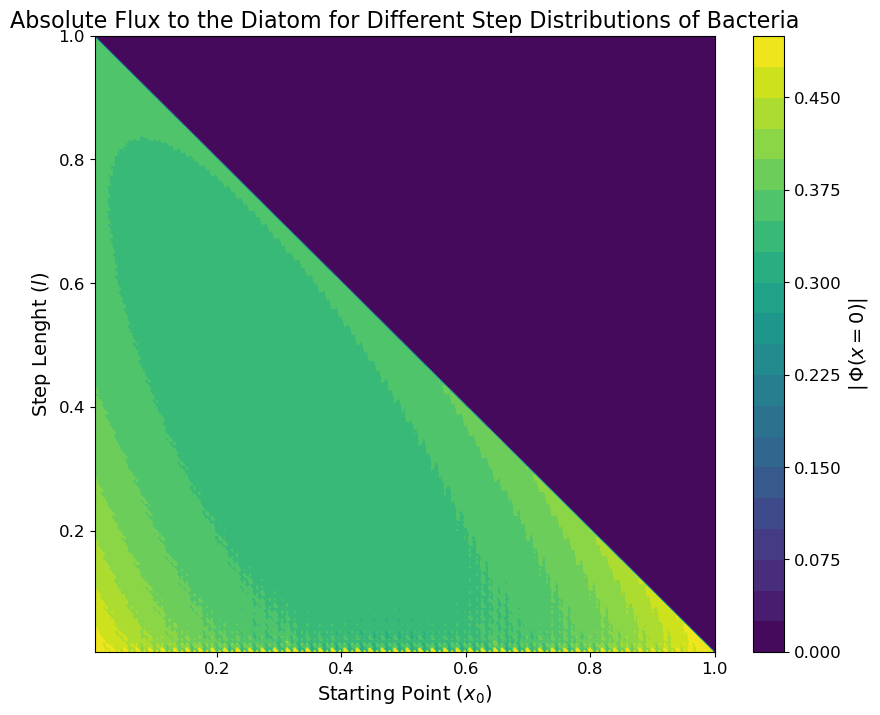

In [9]:
# Number of x0 & l points
n_x0 = n_l = 250

x0_values, l_values, flux_map = compute_flux_map(syst_params, n0_linear, n_x0, n_l)
plot_flux_map(x0_values, l_values, flux_map)

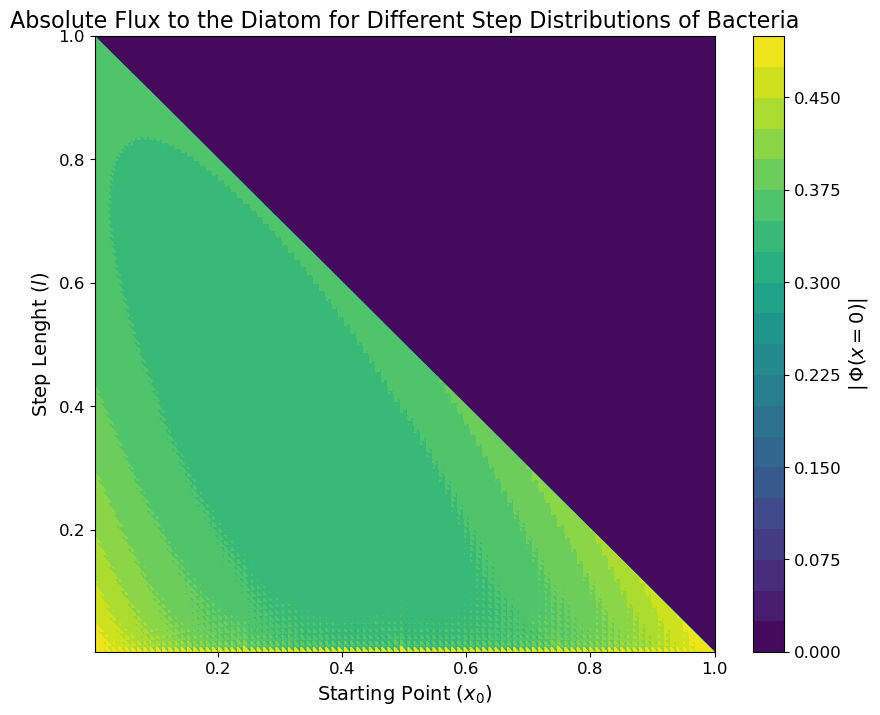

In [10]:
# Number of x0 & l points
n_x0 = n_l = 500

x0_values, l_values, flux_map = compute_flux_map(syst_params, n0_linear, n_x0, n_l)
plot_flux_map(x0_values, l_values, flux_map)

## Different diffusion / consumption ratios

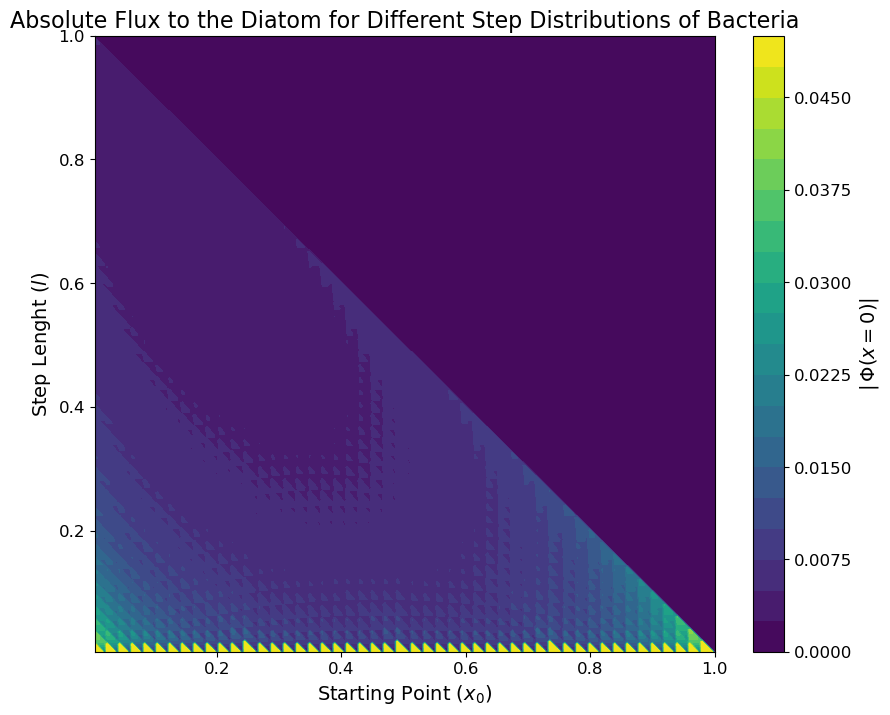

In [28]:
syst_params = {
'L' : 1.0,  'T' : 1.0,
'Tc': 1.0,  'Td': 10,
'Nb': 1.0,
'nx': 50,   'nt': 100
}
L = syst_params['L']

def n0_linear(x):
    return x / L

# Number of x0 & l points
n_x0 = n_l = 250

x0_values, l_values, flux_map = compute_flux_map(syst_params, n0_linear, n_x0, n_l)
plot_flux_map(x0_values, l_values, flux_map)

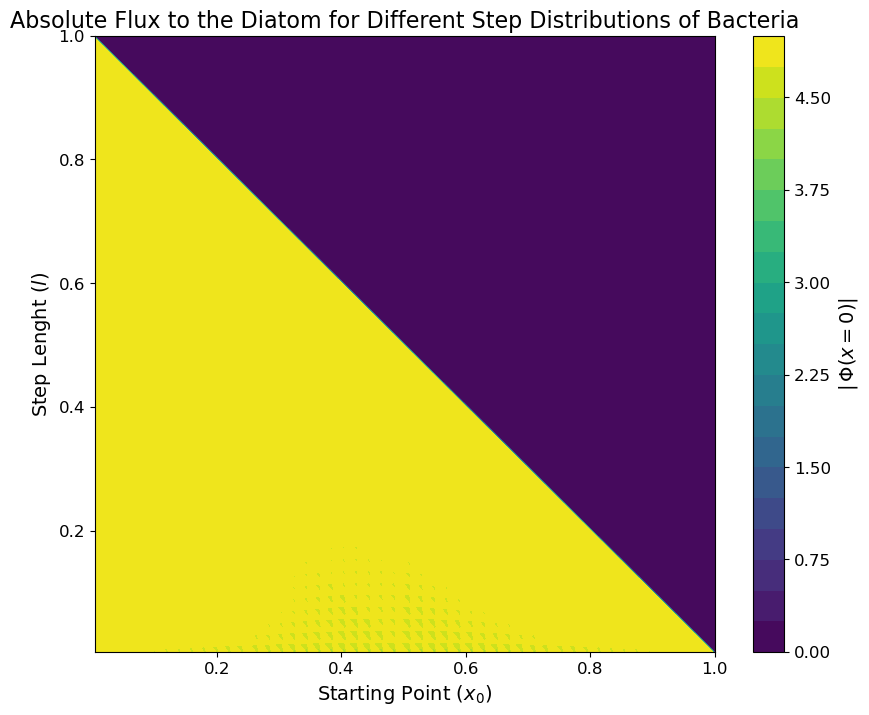

In [29]:
syst_params = {
'L' : 1.0,  'T' : 1.0,
'Tc': 1.0,  'Td': 0.1,
'Nb': 1.0,
'nx': 50,   'nt': 100
}
L = syst_params['L']

def n0_linear(x):
    return x / L

# Number of x0 & l points
n_x0 = n_l = 250

x0_values, l_values, flux_map = compute_flux_map(syst_params, n0_linear, n_x0, n_l)
plot_flux_map(x0_values, l_values, flux_map)